In [1]:
import os
from dotenv import load_dotenv,find_dotenv
_ = load_dotenv(find_dotenv())
groq_api_key = os.getenv("GROQ_API_KEY")

https://docs.unstructured.io/open-source/core-functionality/chunking

To resolve this on Windows:

Download Poppler for Windows from: https://github.com/oschwartz10612/poppler-windows/releases/

Extract the downloaded zip file to a folder, e.g., C:\poppler.

Add the bin directory (e.g., C:\poppler\Library\bin or C:\poppler\bin) to your system PATH:
Open System Properties > Environment Variables.

Under "System variables", find and select Path, then click Edit.
Add the path to the Poppler bin directory.

Click OK to save and close all dialogs.

Restart Visual Studio Code to ensure the new PATH is recognized.

In [2]:
from unstructured.partition.pdf import partition_pdf

file_path ='Attenstion all you Need.pdf'
output_path = 'output'
# Reference: https://docs.unstructured.io/open-source/core-functionality/chunking
chunks = partition_pdf(
    filename=file_path,
    infer_table_structure=True,            # extract tables
    strategy="hi_res",                     # mandatory to infer tables
    extract_image_block_types=["Image","Table"],   # Add 'Table' to list to extract image of tables
    extract_image_block_output_dir=output_path,   # if None, images and tables will saved in base64
    extract_image_block_to_payload=False,  # if true, will extract base64 for API usage
    extract_images_in_pdf=True,          # deprecated
)

t:\LangGraph\Langchain\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


In [3]:
chunks

In [4]:
Headers =[]
Footer = []
Title = []
NarrativeText = []
Text =[]
ListItem=[]

for element in chunks:
    if "unstructured.documents.elements.Header" in str(type(element)):
        Headers.append(str(element))
    elif "unstructured.documents.elements.Footer" in str(type(element)):
        Footer.append(str(element))
    elif "unstructured.documents.elements.Title" in str(type(element)):
        Title.append(str(element))
    elif "unstructured.documents.elements.NarrativeText" in str(type(element)):
        NarrativeText.append(str(element))
    elif "unstructured.documents.elements.Text" in str(type(element)):
        Text.append(str(element))
    elif "unstructured.documents.elements.ListItem" in str(type(element)):
        ListItem.append(str(element))

In [5]:
NarrativeText

['Provided proper attribution is provided, Google hereby grants permission to reproduce the tables and figures in this paper solely for use in journalistic or scholarly works.',
 'Noam Shazeer∗ Google Brain noam@google.com',
 'Niki Parmar∗ Google Research nikip@google.com',
 'Google Research usz@google.com',
 'Google Research llion@google.com',
 'Aidan N. Gomez∗ † University of Toronto aidan@cs.toronto.edu',
 'Łukasz Kaiser∗ Google Brain lukaszkaiser@google.com',
 'illia.polosukhin@gmail.com',
 'The dominant sequence transduction models are based on complex recurrent or convolutional neural networks that include an encoder and a decoder. The best performing models also connect the encoder and decoder through an attention mechanism. We propose a new simple network architecture, the Transformer, based solely on attention mechanisms, dispensing with recurrence and convolutions entirely. Experiments on two machine translation tasks show these models to be superior in quality while being mo

In [6]:
img =[]

for element in chunks:
    if "unstructured.documents.elements.Image" in str(type(element)):
        img.append(str(element))


In [7]:
img

['Output Probabilities Add & Norm Feed Forward Add & Norm Multi-Head Attention a, Add & Norm Add & Norm Feed Forward Nx | -+CAgc8 Norm) Add & Norm Masked Multi-Head Multi-Head Attention Attention Se a, ee a, Positional Positional Encoding @ © @ Encoding Input Output Embedding Embedding Inputs Outputs (shifted right)',
 '',
 'Linear',
 '2 i i= RE 3 2 i 2 = = 2c 3 2 £ om % S GBANAAAA fe. Re) [a Q €oe2s ozeseyzses 26e8 TL _ FFREKR8TZESHBOP_,SSESE DSsSSsSESE ~2£FFE€voFEnvnFECRCoecacKRGNESLSESSCEGC -vVvVVVVV HMO KEBOCSRSHLHOD QLSARBYXE FE OH “A ARAAKRAAA “= <2 £ 8 FogesouggsS ss P25 5273 Qvryxapvs\\3 es sa 5 Seeneteecorzgrs = Q ogs aaa oO 2 Sere =~ aA o ° 8 aaqaaq0gqaqg o o o 5 > o wWUvvvvVvV Vv —e €E£ © e 2 6 v Do <¢ 8 & |',
 '<ped> <ped> UOIUIdO == Aw ul Bulssiw ale « aM = yeum = S| sy ysnf pinoys = uoluldo Aw ul Bulssiw ae ysnf 38q Pinoys uojeojdde Ss}! nq poped 38q JaAou Me] au <ped> <SOa> uojuido Aw ul Bulssiuw oe aM yeum S| SIU} ysnf 3q Pinoys uojeodde Ss}! ynq yoped 3q 4eAeuU meq auL

In [8]:
Table=[]
for element in chunks:
  if "unstructured.documents.elements.Table" in str(type(element)):
              Table.append(str(element))

In [9]:
Table

['Layer Type Complexity per Layer Sequential Maximum Path Length Operations Self-Attention O(n2 · d) O(1) O(1) Recurrent O(n · d2) O(n) O(n) Convolutional O(k · n · d2) O(1) O(logk(n)) Self-Attention (restricted) O(r · n · d) O(1) O(n/r)',
 'Model BLEU EN-DE EN-FR Training Cost (FLOPs) EN-DE EN-FR ByteNet [18] 23.75 Deep-Att + PosUnk [39] 39.2 1.0 · 1020 GNMT + RL [38] 24.6 39.92 2.3 · 1019 1.4 · 1020 ConvS2S [9] 25.16 40.46 9.6 · 1018 1.5 · 1020 MoE [32] 26.03 40.56 2.0 · 1019 1.2 · 1020 Deep-Att + PosUnk Ensemble [39] 40.4 8.0 · 1020 GNMT + RL Ensemble [38] 26.30 41.16 1.8 · 1020 1.1 · 1021 ConvS2S Ensemble [9] 26.36 41.29 7.7 · 1019 1.2 · 1021 Transformer (base model) 27.3 38.1 3.3 · 1018 Transformer (big) 28.4 41.8 2.3 · 1019',
 'N dmodel dff h dk dv Pdrop ϵls train steps PPL (dev) BLEU params (dev) ×106 base 6 512 2048 8 64 64 0.1 0.1 100K 4.92 25.8 65 1 512 512 5.29 24.9 (A) 4 16 128 32 128 32 5.00 4.91 25.5 25.8 32 16 16 5.01 25.4 (B) 16 32 5.16 5.01 25.1 25.4 58 60 2 6.11 23.7 

## Table Summary

In [10]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain_groq  import ChatGroq
import os
from dotenv import load_dotenv,find_dotenv
_ = load_dotenv(find_dotenv())
groq_api_key = os.getenv("GROQ_API_KEY")

In [11]:
# Prompt
prompt_text = """You are an assistant tasked with summarizing tables for retrieval. \
    These summaries will be embedded and used to retrieve the raw table elements. \
    Give a concise summary of the table that is well optimized for retrieval. Table:{element} """

In [12]:
prompt = ChatPromptTemplate.from_template(prompt_text)

In [13]:
model = ChatGroq(model ="deepseek-r1-distill-llama-70b")

In [14]:
summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

In [15]:
table_summaries = []
table_summaries = summarize_chain.batch(Table, {"max_concurrency": 5})

In [16]:
table_summaries

["<think>\nOkay, so I need to summarize this table for retrieval. Let me look at the table first. It has columns: Layer Type, Complexity per Layer, Sequential Maximum Path Length, and Operations. The rows are different types of layers: Self-Attention, Recurrent, Convolutional, and Self-Attention (restricted).\n\nI think the main idea is to highlight each layer type and their associated metrics. I should mention each one and their specific complexities, path lengths, and operations. Maybe start with an overview that each layer has different computational and structural characteristics.\n\nFor Self-Attention, the complexity is O(n²·d), path length is O(1), and operations are O(1). Recurrent has O(n·d²) complexity, path length O(n), and operations O(n). Convolutional is O(k·n·d²), path length O(1), operations O(log_k(n)). The restricted Self-Attention has O(r·n·d) complexity, path length O(1), and operations O(n/r).\n\nI should make sure to include all these details clearly and concisely 

## Text Summary

In [17]:
# Prompt
prompt_text = """You are an assistant tasked with summarizing text for retrieval. \
    These summaries will be embedded and used to retrieve the raw text elements. \
    Give a concise summary of the table or text that is well optimized for retrieval.text: {element} """


In [18]:
prompt = ChatPromptTemplate.from_template(prompt_text)

In [19]:
model = ChatOpenAI(temperature=0, model="gpt-4")
summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

In [20]:
text_summaries = []
text_summaries = summarize_chain.batch(Text, {"max_concurrency": 5})

## images Summary 

In [21]:
import base64
import os
from langchain_core.messages import HumanMessage

In [22]:
def encode_image(image_path):
    """Getting the base64 string"""
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

In [32]:
def image_summarize(img_base64, prompt):
    """Make image summary"""
    chat = ChatOpenAI(model="gpt-4o-mini", max_tokens=1024)

    msg = chat.invoke(
        [
            HumanMessage(
                content=[
                    {"type": "text", "text": prompt},
                    {
                        "type": "image_url",
                        "image_url": {"url": f"data:image/jpeg;base64,{img_base64}"},
                    },
                ]
            )
        ]
    )
    return msg.content

In [33]:
def generate_img_summaries(path):
    """
    Generate summaries and base64 encoded strings for images
    path: Path to list of .jpg files extracted by Unstructured
    """

    # Store base64 encoded images
    img_base64_list = []

    # Store image summaries
    image_summaries = []

    # Prompt
    prompt = """You are an assistant tasked with summarizing images for retrieval. \
    These summaries will be embedded and used to retrieve the raw image. \
    Give a concise summary of the image that is well optimized for retrieval."""

    # Apply to images
    for img_file in sorted(os.listdir(path)):
        if img_file.endswith(".jpg"):
            img_path = os.path.join(path, img_file)
            base64_image = encode_image(img_path)
            img_base64_list.append(base64_image)
            image_summaries.append(image_summarize(base64_image, prompt))


    return img_base64_list, image_summaries

In [34]:
fpath="./output"
img_base64_list, image_summaries = generate_img_summaries(fpath)

In [35]:
image_summaries

['An abstract visualization indicating the complexity of voting registration and processes in the U.S. Features multiple words and phrases connected by lines, highlighting themes of legislation, difficulty, and changes since 2009.',
 'The image appears to display a visual representation of relationships between words or phrases, possibly illustrating a complex statement about the nature of law and its application. Key themes include the notion that the law may never be perfect, along with expressions of opinion regarding what is lacking in the application of the law. Overall, the graphic likely emphasizes the challenges and perceptions surrounding legal principles.',
 'A visualization of word connections displaying phrases related to the law, its application, and subjective opinions. The image features interconnected words and phrases, illustrating complex relationships and meanings with varying line intensities, indicating the strength of connections.',
 'A visual representation of te

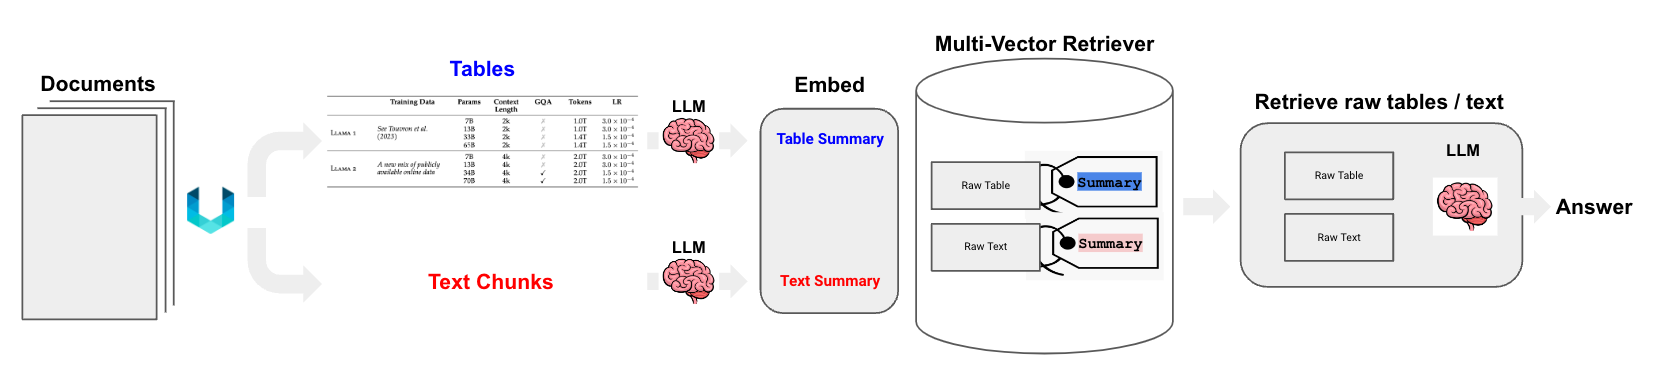

# Creating a MultiVector Retriever

In [36]:
import uuid

from langchain.retrievers.multi_vector import MultiVectorRetriever
from langchain.storage import InMemoryStore
from langchain_community.vectorstores import Chroma
from langchain_core.documents import Document
from langchain_openai import OpenAIEmbeddings

In [37]:
def create_multi_vector_retriever(vectorstore, text_summaries, texts, table_summaries, tables, image_summaries, images):
    """
    Create retriever that indexes summaries, but returns raw images or texts
    """

    # Initialize the storage layer
    store = InMemoryStore()
    id_key = "doc_id"

    # Create the multi-vector retriever
    retriever = MultiVectorRetriever(
        vectorstore=vectorstore,
        docstore=store,
        id_key=id_key,
    )


    # Helper function to add documents to the vectorstore and docstore
    def add_documents(retriever, doc_summaries, doc_contents):

      doc_ids = [str(uuid.uuid4()) for _ in doc_contents]

      summary_docs = [
              Document(page_content=s, metadata={id_key: doc_ids[i]})
              for i, s in enumerate(doc_summaries)
          ]

      retriever.vectorstore.add_documents(summary_docs)
      retriever.docstore.mset(list(zip(doc_ids, doc_contents)))

      # Add texts, tables, and images
      # Check that text_summaries is not empty before adding
      if text_summaries:
          add_documents(retriever, text_summaries, texts)
      # Check that table_summaries is not empty before adding
      if table_summaries:
          add_documents(retriever, table_summaries, tab)
      # Check that image_summaries is not empty before adding
      if image_summaries:
          add_documents(retriever, image_summaries, img)

    return retriever

vectorstore = Chroma(
    collection_name="mm_rag", embedding_function=OpenAIEmbeddings()
)

# Create retriever
retriever_multi_vector_img = create_multi_vector_retriever(
    vectorstore,
    text_summaries,
    Text,
    table_summaries,
    Table,
    image_summaries,
    img_base64_list,
)

C:\Users\Acer\AppData\Local\Temp\ipykernel_8656\1848821793.py:44: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectorstore = Chroma(


In [38]:
retriever_multi_vector_img

MultiVectorRetriever(vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x0000024557D2A120>, docstore=<langchain_core.stores.InMemoryStore object at 0x00000245580C6A50>, search_kwargs={})

In [39]:
import io
import re

from IPython.display import HTML, display
from PIL import Image

In [40]:
def plt_img_base64(img_base64):
    """Disply base64 encoded string as image"""
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # Display the image by rendering the HTML
    display(HTML(image_html))



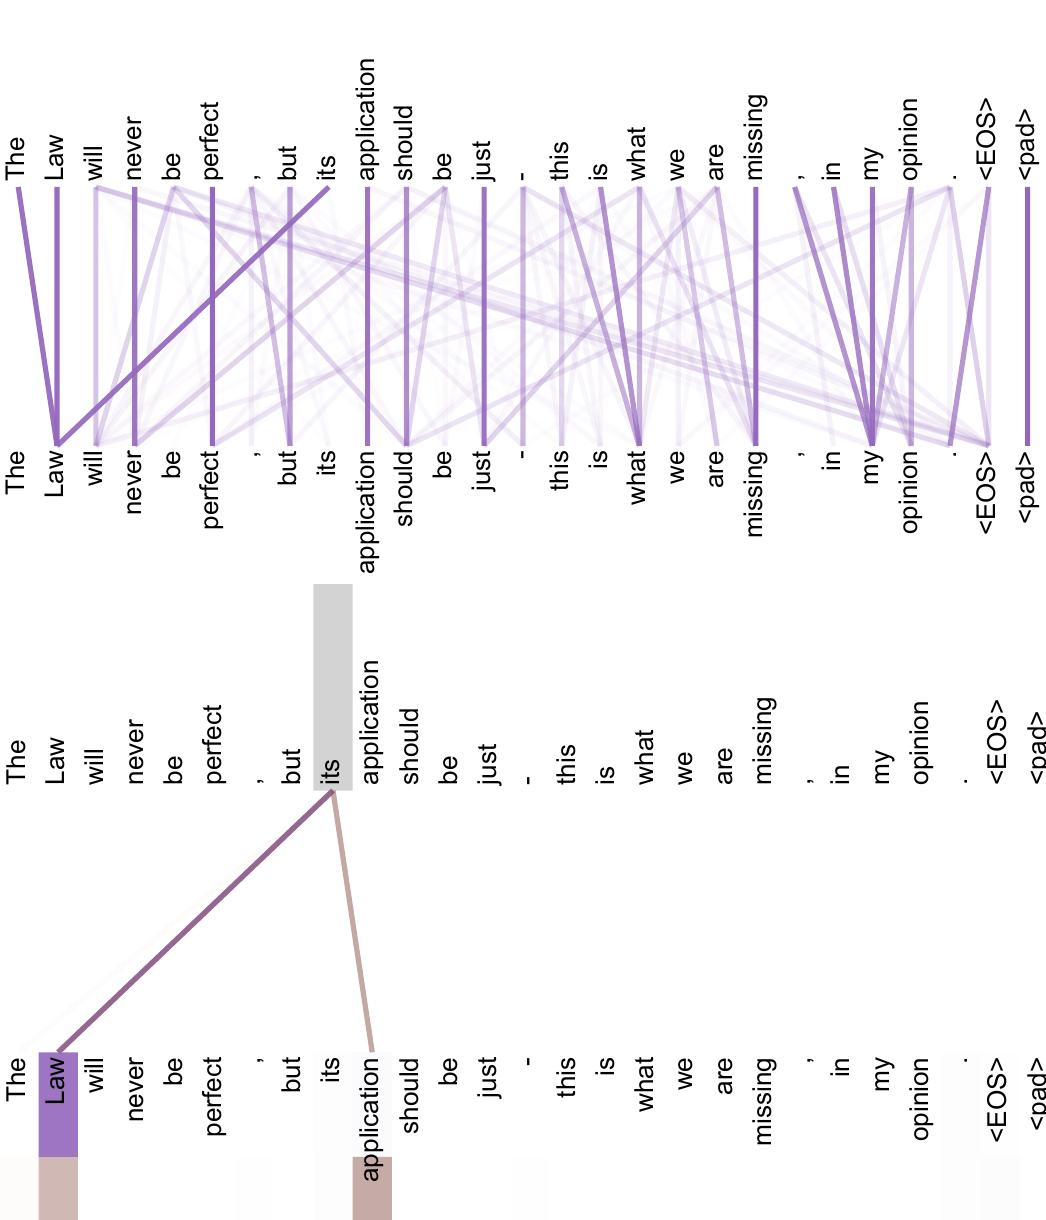

In [41]:
plt_img_base64(img_base64_list[1])

In [42]:
image_summaries[1]

'The image appears to display a visual representation of relationships between words or phrases, possibly illustrating a complex statement about the nature of law and its application. Key themes include the notion that the law may never be perfect, along with expressions of opinion regarding what is lacking in the application of the law. Overall, the graphic likely emphasizes the challenges and perceptions surrounding legal principles.'

In [43]:
def looks_like_base64(sb):
    """Check if the string looks like base64"""
    return re.match("^[A-Za-z0-9+/]+[=]{0,2}$", sb) is not None


In [44]:
def is_image_data(b64data):
    """
    Check if the base64 data is an image by looking at the start of the data
    """
    image_signatures = {
        b"\xFF\xD8\xFF": "jpg",
        b"\x89\x50\x4E\x47\x0D\x0A\x1A\x0A": "png",
        b"\x47\x49\x46\x38": "gif",
        b"\x52\x49\x46\x46": "webp",
    }
    try:
        header = base64.b64decode(b64data)[:8]  # Decode and get the first 8 bytes
        for sig, format in image_signatures.items():
            if header.startswith(sig):
                return True
        return False
    except Exception:
        return False

In [45]:
def resize_base64_image(base64_string, size=(128, 128)):
    """
    Resize an image encoded as a Base64 string
    """
    # Decode the Base64 string
    img_data = base64.b64decode(base64_string)
    img = Image.open(io.BytesIO(img_data))

    # Resize the image
    resized_img = img.resize(size, Image.LANCZOS)

    # Save the resized image to a bytes buffer
    buffered = io.BytesIO()
    resized_img.save(buffered, format=img.format)

    # Encode the resized image to Base64
    return base64.b64encode(buffered.getvalue()).decode("utf-8")

In [46]:
def split_image_text_types(docs):
    """
    Split base64-encoded images and texts
    """
    b64_images = []
    texts = []

    for doc in docs:
        # Check if the document is of type Document and extract page_content if so
        if isinstance(doc, Document):
            doc = doc.page_content
        if looks_like_base64(doc) and is_image_data(doc):
            doc = resize_base64_image(doc, size=(1300, 600))
            b64_images.append(doc)
        else:
            texts.append(doc)

    return {"images": b64_images, "texts": texts}

In [47]:
def img_prompt_func(data_dict):
    """
    Join the context into a single string
    """
    #print(data_dict)
    formatted_texts = "\n".join(data_dict["context"]["texts"])
    messages = []

    # Adding image(s) to the messages if present
    if data_dict["context"]["images"]:
        for image in data_dict["context"]["images"]:
            image_message = {
                "type": "image_url",
                "image_url": {"url": f"data:image/jpeg;base64,{image}"},
            }
            messages.append(image_message)

    # Adding the text for analysis
    text_message = {
        "type": "text",
        "text": (
            "You are a helpful assistant.\n"
            "You will be given a mixed info(s) .\n"
            "Use this information to provide relevant information to the user question. \n"
            f"User-provided question: {data_dict['question']}\n\n"
            "Text and / or tables:\n"
            f"{formatted_texts}"
        ),
    }
    messages.append(text_message)
    return [HumanMessage(content=messages)]

In [48]:
from langchain_core.runnables import RunnableLambda, RunnablePassthrough

In [55]:
def multi_modal_rag_chain(retriever):
    """
    Multi-modal RAG chain
    """

    # Multi-modal LLM
    model = ChatOpenAI(temperature=0, model="gpt-4o-mini", max_tokens=1024)


    # RAG pipeline
    chain = (
        {
            "context": retriever | RunnableLambda(split_image_text_types),
            "question": RunnablePassthrough(),
        }
        | RunnableLambda(img_prompt_func)
        | model
        | StrOutputParser()
    )

    return chain

In [56]:
chain_multimodal_rag = multi_modal_rag_chain(retriever_multi_vector_img)

In [57]:
chain_multimodal_rag

{
  context: MultiVectorRetriever(vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x0000024557D2A120>, docstore=<langchain_core.stores.InMemoryStore object at 0x00000245580C6A50>, search_kwargs={})
           | RunnableLambda(split_image_text_types),
  question: RunnablePassthrough()
}
| RunnableLambda(img_prompt_func)
| ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x000002455B5553D0>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x000002455B555300>, root_client=<openai.OpenAI object at 0x00000245589CD010>, root_async_client=<openai.AsyncOpenAI object at 0x00000245589CD0F0>, model_name='gpt-4o-mini', temperature=0.0, model_kwargs={}, openai_api_key=SecretStr('**********'), max_tokens=1024)
| StrOutputParser()

In [58]:
# Check retrieval
query = "Why We combine a pre-trained retriever (Query Encoder + Document Index) with a pre-trained seq2seq model (Generator) and fine-tune end-to-end?"
docs = retriever_multi_vector_img.invoke(query)



In [59]:
docs

[]

In [60]:
chain_multimodal_rag.invoke(query)

'Combining a pre-trained retriever (Query Encoder + Document Index) with a pre-trained seq2seq model (Generator) and fine-tuning them end-to-end offers several advantages in information retrieval and natural language processing tasks. Here are some key reasons for this approach:\n\n1. **Efficiency in Retrieval**: The retriever component is designed to quickly identify relevant documents or passages from a large corpus based on the input query. By using a pre-trained query encoder, the system can leverage learned representations to efficiently match queries with relevant documents.\n\n2. **Improved Relevance**: The retriever can filter out irrelevant documents before they are passed to the generator. This two-step process ensures that the generator focuses on the most relevant information, which can lead to higher quality outputs.\n\n3. **Leveraging Pre-trained Models**: Both the retriever and generator benefit from pre-training on large datasets. This pre-training allows them to unders